In [97]:
using Jacobi
using PyPlot
#intervalo 
a = -5 ; b = 5


function plot_aprox_runge(z)
    f(x) = 1./(1 + x.^2)
    x = linspace(a,b,101)
    plot(x,f(x))
    nx = 100
    x2 = linspace(a, b, nx)
    ye2 = f(x2)
    #plot(x2, ye2, "-",label="Original")
    #title("Interpolação para \n Raízes de Gauss-Lobatto-Jacobi")
    legend()
    N =35
    errog = [0]
    
    nx= 1000
    x = linspace(a, b, nx)

    #altera o intervalo de interpolação
    z = ((1-z)/(2)).*a + ((1+z)/(2)).*b

    ye = f(z)

    Im = interp_mat(x, z)
    y =  Im * ye

    plot(x, y, "--",label = "$Q")


    erro = maxabs(y-f(x))
    title("erro para  P_$Q = $erro")
end


function plot_aprox_fun(z,f,a,b)
    
    x = linspace(a,b,101)
    plot(x,f(x),label="original")
    nx = 100
    
    N =35
    errog = [0]
    nx= 1000
    x = linspace(a, b, nx)

    #altera o intervalo de interpolação
    z = ((1-z)/(2)).*a + ((1+z)/(2)).*b

    ye = f(z)

    Im = interp_mat(x, z)
    y =  Im * ye

    plot(x, y, "--",label = "$Q")

    legend()
    erro = maxabs(y-f(x))
   
end

plot_aprox_fun (generic function with 2 methods)

In [ ]:
plot_aprox_fun()

# Métodos espectrais de alta ordem 
# na resolução de equações diferenciais

<img src = "Figuras/logo.png" >
Receita:
* método  espectral
* método  elementos finitos

Modo de preparo:
* junte os dois métodos 

Porção:
* n pessoas para $ n \rightarrow \infty$




## Método Espectral
 Para fazer a interpolação da função $f(x)$ por um polinômio trigonométrico ou não, de grau $n$, $P_{n}(x)$ satisfazendo:

\begin{equation}
	P_n (x_i)\ =\ f(x_i) \ \ \ i = 1,2,...,n+1
\end{equation}

 Onde $f(x_i)$ é a função $f$ pré-calculada nos pontos $x_i$. A escolha desses pontos $x_i$ ainda será explicada.


## Polinômio interpolador
Para fazermos essa interpolação para $n$ pontos conhecidos aproximamos uma função usando o polinômio base de **Lagrange**.
\begin{equation}
C_i(x) = \prod_{j = 0 \\ j \neq i}^{N} \frac{x - x_j}{x_i - x_j} 
\end{equation} 


<img src = "Figuras/exemplo_polinomio_lagrange.png" >


A interpolação de **Lagrange** é dada por :
\begin{equation}
 P_n(x) \equiv \sum_{i = 0}^{N} f(x_i)C_i(x) 
\end{equation}
Obedecendo que $P_n(x_i) = f(x_i)$. 

#  Quais pontos ($x_i$) escolher ?

## Temos um problema e ele se chama Fenômeno de Runge


# A Função
 \begin{equation}
 f(x) = \frac{1}{1 + x^2} , x \in [-5,5]
 \end{equation}
<img src = "Figuras/runge_fun.png" >

# Pontos equidistantes ?

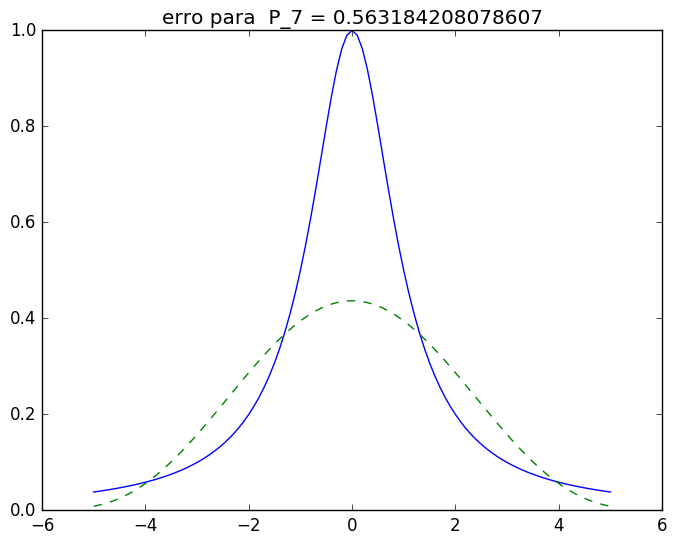

PyObject <matplotlib.text.Text object at 0x7fe35f00ba50>

In [84]:
N = 20
xᵢ = linspace(-1,1,N)

f(x) = 1/(1 + x.^2)
xᵢ = ((1-xᵢ)/(2)).*-5 + ((1+xᵢ)/(2)).*5
plot_aprox_runge(xᵢ)
#[PyPlot.axvline(xᵢ,color="red") for xᵢ in xᵢ]

# Pontos de Chebychev

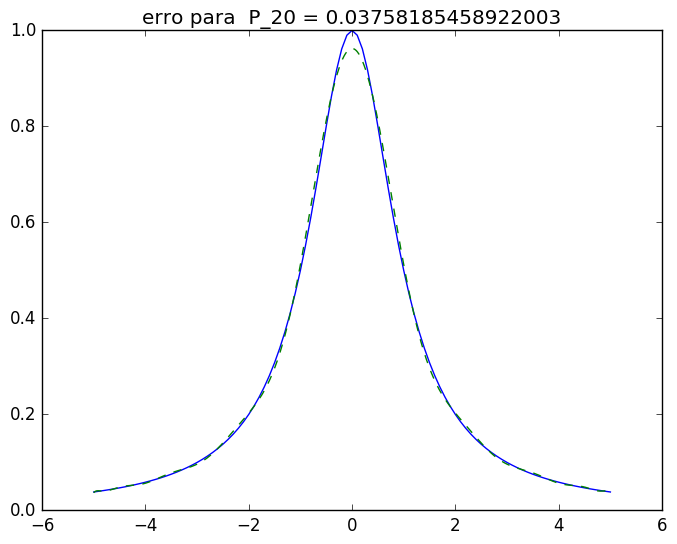

20-element Array{Float64,1}:
 -4.98459 
 -4.86185 
 -4.6194  
 -4.2632  
 -3.80203 
 -3.24724 
 -2.61249 
 -1.91342 
 -1.16723 
 -0.392295
  0.392295
  1.16723 
  1.91342 
  2.61249 
  3.24724 
  3.80203 
  4.2632  
  4.6194  
  4.86185 
  4.98459 

In [86]:
Q = 20
xᵢ = Jacobi.chebyshev_zeros(Q)
plot_aprox_runge(xᵢ)
xᵢ = ((1-xᵢ)/(2)).*-5 + ((1+xᵢ)/(2)).*5

#[PyPlot.axvline(xᵢ,color="red") for xᵢ in xᵢ]

# Aproximando funções 

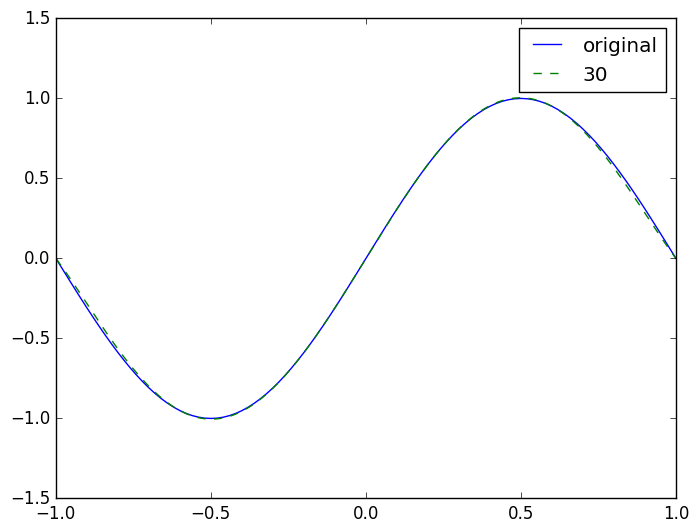

0.026754143605034808

In [93]:
Q = 30
g(x) = sin(x*pi)
z = zglj(Q)
z = linspace(-1,1,6)
#z = Jacobi.chebyshev2_zeros(Q)
#z = linspace(-1,1,Q)
plot_aprox_fun(z,g,-1,1)

In [74]:
include("../../HPFEM.jl/src/HPFEM.jl")
include("../../HPFEM_mod.jl/src/HPFEM_mod.jl")

lagrange_oed_spec (generic function with 5 methods)

# Método Elementos Finitos

<img src = "Figuras/phis_elementos_finitos.png" >
<img src = "Figuras/exemplo_elementos_finitos.png" >


# ir para o .ipynb Lagrange spectral-elem_aprox

# Derivação



 Com a interpolação de $f(x) \in P_p$, onde $P_p$ é o espaço de polinômios de grau $\leq p$, pode ser reescrito em termos de polinômios de Lagrange $C_i$, por $N + 1$ e $x \in -1 \leq x \leq 1$ pontos como:
 \begin{equation}
 f(x)  = \sum^{N}_{0} f(x_i) C_i(x)
 \end{equation}
 A derivada da $f(x)$ é dada por:
 \begin{equation}
 \frac{\partial f(x)}{\partial x} = \sum^{N}_{i = 0} f(x_i) \frac{\partial C_i(x)}{\partial x}
 \end{equation}



 Calculando $\frac{\partial f(x)}{\partial x}$ nos pontos nodais $x_i$, temos:
\begin{equation}
   \frac{\partial f(x)}{\partial x}  \Biggm\lvert_{x=x_i} = \sum^{N}_{j\ = 0} f(x_j) C_{ij}
\end{equation}
 Onde:
 \begin{equation}
  C_{ij} = \frac{\partial C_i(x)}{\partial x} \Biggm\lvert_{x=x_i}
 \end{equation}
 a derivada de $C_i(x)$ é:
 \begin{align}
 &C_i(x) = \frac{P_{n+1}(x)}{P'_{n+1}(x)(x -\ x_i)}\ ,\ P_{n+1}(x) = \prod^{N}_{0} (x - x_j)\\
 &\frac{\partial C_i(x)}{\partial x} =  \frac{P'_{n+1}(x)(x\ -\ x_i) - P_{n+1}(x)}{P'_{n+1}(x)(x - x_i)^2}\ 
 \end{align}

 temos que para x tendendo para $x_i$:
 \begin{equation}
 \lim_{x \rightarrow x_i}  \frac{\partial C_i(x)}{\partial x} =  \lim_{x \rightarrow x_i} \frac{P''_{n+1}(x)}{2P'_{n+1}(x)} = \frac{P''_{n+1}(x_i)}{2P'_{n+1}(x_i)}
 \end{equation}
 assim, ficamos com:
 \begin{equation}
 C_{ij}= 
\begin{cases}
    \frac{P'_{n+1}(x_i)}{P'_{n+1}(x_j)} \frac{1}{(x_i - x_j)},& \text{se}\ i\ \neq  j\\\\
    \frac{P''_{n+1}(x_i)}{2P''_{n+1}(x_j)},              & \text{caso contrário}
\end{cases}
 \end{equation}
 Matricialmente podemos fazer:
\begin{equation}
 U'= \begin{bmatrix} 
u'(x_0)\\ 
u'(x_1)\\
...\\
u'(x_N)\\ 
\end{bmatrix} =
\begin{bmatrix}
C_{00} &   C_{01} & \ldots & C_{0N}\\
C_{10}  &  C_{11} & \ldots & C_{1N}\\
\vdots & \vdots & \ddots & \vdots\\
C_{N0}  &   C_{N1}       &\ldots & C_{NN}
\end{bmatrix}. \begin{bmatrix} 
u_{0}\\ 
u_{1}\\
\vdots\\
u_{N}\\ 
\end{bmatrix} 
\end{equation}  
  Para a mudança de intervalo $ x \in [-1,1]$ para $y \in [a,b]$ podemos fazer:
\begin{align}
&y = \frac{(1-x)}{2}a + \frac{(1+x)}{2}b \\
&\frac{\partial y}{\partial x} = \frac{(b -a)}{2}\\
&\frac{\partial f}{\partial x} = \frac{\partial f}{\partial y}. \frac{\partial y}{\partial x} \\
&\frac{\partial f}{\partial y} =  (\frac{\partial y}{\partial x})^{-1}.\frac{\partial f}{\partial x} \\
&\frac{\partial f}{\partial y} = \frac{2}{(b -a)}.\frac{\partial f}{\partial x}
\end{align}

# Integração 

 Usando os polinômios interpoladores $P_i$ de uma mesma família qualquer,  de grau menor ou igual a $n$, podemos escrever a integral de $f$ no intervalo $[a,b]$:
 
\begin{equation}
\int^{a}_b f(x) \partial x\ = \int^{a}_b[\sum_{i\ =\ 0}^N P_i(x) f(x_i)]\ \partial x +  \int^{a}_b \prod_{i\ =\ 0} (x - x_i)\frac{f^{(n+1)}(\varepsilon)}{(n+1)!}\ \partial x\\
\end{equation}

podemos aproximar a integral por:
\begin{equation}
   \int^{a}_b f(x) \partial x\ \approx \sum_{i\ =\ 0}^N f(x_i) \int^{a}_b P_i(x) \partial x\ =\ \sum_{i\ =\ 0}^N f(x_i) w_i \\
\end{equation}

onde o coeficiente é:
\begin{equation}
 w_i =  \int^{a}_b  P_i(x) 
\end{equation}


# Resolvendo EDO utilizando os métodos anteriores
 

# Método dos resíduos ponderados

Tendo uma equação diferencial dada por :
\begin{equation}
    L(u) = \frac{\partial^2 u}{\partial x^2} + \lambda u + f = 0 \\
    L(u) = 0
\end{equation}
queremos encontrar $u^\delta$ que resolva essa EDO:
\begin{equation}
u^\delta(x) = u(x_0) + \sum^{N_{dof}}_{i = 1} u(x_i) \Phi(x)
\end{equation}


Substituindo $u^\delta$ em $L(u)$ temos um resíduo:
\begin{equation}
    L(u^\delta) = R(u^\delta)
\end{equation}
Logo, sendo o produto interno definido por:
\begin{equation}
    <f,g> = \int_{\Omega} f(x)\ g(x) \partial x
\end{equation}
Queremos minimizar $R(u^\delta)$ utilizando o produto interno desse resíduo com uma função teste $v_j(x)$:
\begin{equation}
    <v_j,R> = \int_{\Omega} v_j(x)\ R(x) \partial x,\ \forall j = 1,2,3,\dots,N_{dof}\\
    <v_1,R> = \int_{\Omega} v_1(x)\ R(x) \partial x\\
    <v_2,R> = \int_{\Omega} v_2(x)\ R(x) \partial x\\
    <v_3,R> = \int_{\Omega} v_3(x)\ R(x) \partial x\\
    \vdots\\
    <v_{N_{dof}},R> = \int_{\Omega} v_{N_{dof}}(x)\ R(x) \partial x
\end{equation}

Escolhendo corretamente a função teste, encontramos $u(x_0),u(x_1),u(x_2),\dots$ que minimiza a função

$$
\sum_{i=1}^N A_i(u,v) = \sum_{k=1}^M b_k(v)
$$

# Quais $v_j's$ escolher ??

# Método dos mínimos quadrados
 Já visto no curso de graduação, o método dos mínimos quadrados, nada mais é que um tipo de método dos resíduos onde $v_j$ é definido como:
 
 \begin{equation}
 v_j(x) = \frac{\partial R}{\partial u_j}
 \end{equation}

# Método de Galerkin
O método de galerkin, que utilizaremos, definimos $v_j's$ como:
\begin{equation}
    v_j(x) = \Phi_j(x)
\end{equation}
Ou seja, $v_j$ é a própria função interpoladora
<img src = "Figuras/galerkin.jpg" >


# formulação fraca
Logo utilizando o método de galerkin, queremos encontrar $u^\delta$ que minimize $L(u^\delta)$:

\begin{equation}
 <v_j,L(u)>=\int^1_{-1} v_j\left ( \frac{\partial^2u}{\partial x^2} + \lambda u+ f \right )\partial x = 0 \ \forall j\ =\ 1,2,3,\dots,N_{dof}\\ 
\end{equation}



# Como ninguém gosta de algebra, fique aqui com um gif enquanto expando a equação do produto interno
<img src = "Figuras/giphy.gif" >


# Ufa ...
\begin{equation}
\int_\Omega \frac{\partial v}{\partial x}\frac{\partial u}{\partial x}\ + \int_\Omega v\ u\ \partial x  =\  \int_\Omega v\ f \partial x\  +\  v(x)\frac{\partial u(x)}{\partial x}\Biggm\lvert_\Omega
\end{equation}

\begin{equation}
\int_\Omega \frac{\partial v_j}{\partial x}\frac{\partial u}{\partial x}\ + \int_\Omega v_j\ u\ \partial x  =\  \int_\Omega v_j\ f \partial x\  +\  v_j(x)\frac{\partial u(x)}{\partial x}\Biggm\lvert_\Omega \forall j = 1,2,3,\dots,N_{dof}
\end{equation}

\begin{equation}
\sum^{N_{dof}}_{i=0} u_i \int_\Omega  \frac{\partial \Phi_i(x)}{\partial x}\ \frac{\partial \Phi_j(x)}{\partial x}  \partial x + \sum^{N_{dof}}_{i=0} u_i \int_\Omega \Phi_i(x) \Phi_j(x) \partial x = \int_\Omega \Phi_j(x) f(x) \partial x\\
S_{i,j} =  \int_\Omega  \frac{\partial \Phi_i(x)}{\partial x}\ \frac{\partial \Phi_j(x)}{\partial x}  \partial x  \\ M_{i,j} = \int_\Omega \Phi_i(x) \Phi_j(x) \partial x \\
F_{j} = \int_\Omega \Phi_j(x) f(x) \partial x
\end{equation}

# resolvendo a EDO de segundo grau


   $$ y'' + y = (1 + 4 (k \pi)^2)sin(2 k \pi x) \\
y(-1) = y(1) = 0$$

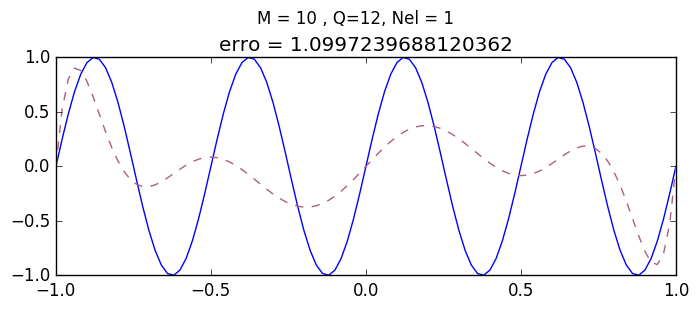

1x2 Array{Float64,2}:
 1.09972  8.0

In [95]:
M = 10
Q = M+2
nel =1
k = 2
fun(x) = (1 + 4*(k*pi)^2)*sin(2*k*pi*x)
resp(x) = sin(2*k*pi*x)
if Q < M
    Q=M
end
subplot(211)
erro = lagrange_oed_plot(M,Q,nel,fun,resp)
dof = lagrange_oed_spec(M,Q,nel,fun,resp)


# Explicações omitidas

* Quais funções de base escolher
* Qual o mapeamento para ir do método Local para o Global
* Static condensation


<img src = "Figuras/test.gif" >